# Loan Prediction Project- Ashish Gore 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('bank_final.csv')
df.head()

,Name,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 26 columns):
Name                 149991 non-null object
City                 149998 non-null object
State                149997 non-null object
Zip                  149999 non-null int64
Bank                 149852 non-null object
BankState            149851 non-null object
CCSC                 149999 non-null int64
ApprovalDate         149999 non-null object
ApprovalFY           149999 non-null int64
Term                 149999 non-null int64
NoEmp                149999 non-null int64
NewExist             149999 non-null int64
CreateJob            149999 non-null int64
RetainedJob          149999 non-null int64
FranchiseCode        149999 non-null int64
UrbanRural           149999 non-null int64
RevLineCr            149976 non-null object
LowDoc               149999 non-null object
ChgOffDate           40466 non-null object
DisbursementDate     149774 non-null object
DisbursementGross   

In [6]:
# % of Null values in the dataset
df.isnull().sum()/len(df)

Name                 0.000053
City                 0.000007
State                0.000013
Zip                  0.000000
Bank                 0.000980
BankState            0.000987
CCSC                 0.000000
ApprovalDate         0.000000
ApprovalFY           0.000000
Term                 0.000000
NoEmp                0.000000
NewExist             0.000000
CreateJob            0.000000
RetainedJob          0.000000
FranchiseCode        0.000000
UrbanRural           0.000000
RevLineCr            0.000153
LowDoc               0.000000
ChgOffDate           0.730225
DisbursementDate     0.001500
DisbursementGross    0.000000
BalanceGross         0.000000
MIS_Status           0.005787
ChgOffPrinGr         0.000000
GrAppv               0.000000
SBA_Appv             0.000000
dtype: float64

In [7]:
# List of Columns
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'CCSC',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [8]:
sns.set_style('whitegrid')

Heatmap of Null values representation

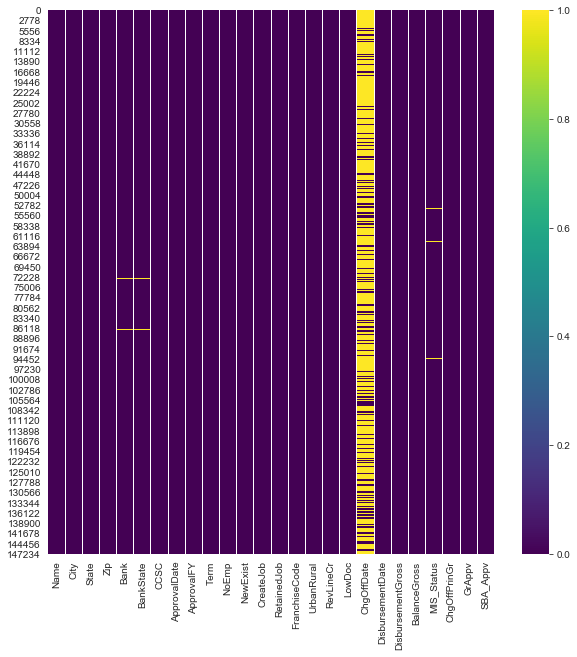

In [9]:
plt.figure(figsize= (10,10))
sns.heatmap(df.isnull(),cmap= 'viridis')

Dealing With Null Values

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median',verbose = 1)

In [11]:
df.drop(labels=['ChgOffDate'],axis=1, inplace = True)

In [12]:
# We perform operations on copy of df to find final remaining observations after dropping null values.
df_copy = df.copy()
df_copy.dropna(inplace = True)
df_copy.shape

(148797, 25)

In [13]:
# After dropping null values from df_copy dataset the values remaining are:
print('shape of original dataset df: ',df.shape)
print('shape of copied dataset df_copy: ',df_copy.shape)
print('% of null values dropped: {:.3f}'.format((df.shape[0] / df_copy.shape[0]) - 1) )

shape of original dataset df:  (149999, 25)
shape of copied dataset df_copy:  (148797, 25)
% of null values dropped: 0.008


In [14]:
for i in np.array(df_copy.columns):
    print('Unique values in ' + str(i) + ' attribute are {}'.format(len(df_copy[i].unique()))  )
    

Unique values in Name attribute are 140237
Unique values in City attribute are 15763
Unique values in State attribute are 51
Unique values in Zip attribute are 19339
Unique values in Bank attribute are 2926
Unique values in BankState attribute are 52
Unique values in CCSC attribute are 1183
Unique values in ApprovalDate attribute are 2517
Unique values in ApprovalFY attribute are 20
Unique values in Term attribute are 342
Unique values in NoEmp attribute are 289
Unique values in NewExist attribute are 3
Unique values in CreateJob attribute are 105
Unique values in RetainedJob attribute are 167
Unique values in FranchiseCode attribute are 1031
Unique values in UrbanRural attribute are 3
Unique values in RevLineCr attribute are 7
Unique values in LowDoc attribute are 4
Unique values in DisbursementDate attribute are 1949
Unique values in DisbursementGross attribute are 38221
Unique values in BalanceGross attribute are 3
Unique values in MIS_Status attribute are 2
Unique values in ChgOffP

In [15]:
# Now selecting only non redundant Variables.
df_copy1 = df_copy[['State', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'BalanceGross','MIS_Status']]

In [16]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148797 entries, 0 to 149998
Data columns (total 12 columns):
State           148797 non-null object
ApprovalFY      148797 non-null int64
Term            148797 non-null int64
NoEmp           148797 non-null int64
NewExist        148797 non-null int64
CreateJob       148797 non-null int64
RetainedJob     148797 non-null int64
UrbanRural      148797 non-null int64
RevLineCr       148797 non-null object
LowDoc          148797 non-null object
BalanceGross    148797 non-null object
MIS_Status      148797 non-null object
dtypes: int64(7), object(5)
memory usage: 14.8+ MB


In [17]:
df_copy1.head()

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status
0,IN,1997,84,4,2,0,0,0,N,Y,$0.00,P I F
1,IN,1997,60,2,2,0,0,0,N,Y,$0.00,P I F
2,IN,1997,180,7,1,0,0,0,N,N,$0.00,P I F
3,OK,1997,60,2,1,0,0,0,N,Y,$0.00,P I F
4,FL,1997,240,14,1,7,7,0,N,N,$0.00,P I F


**Exploratory data Analysis**

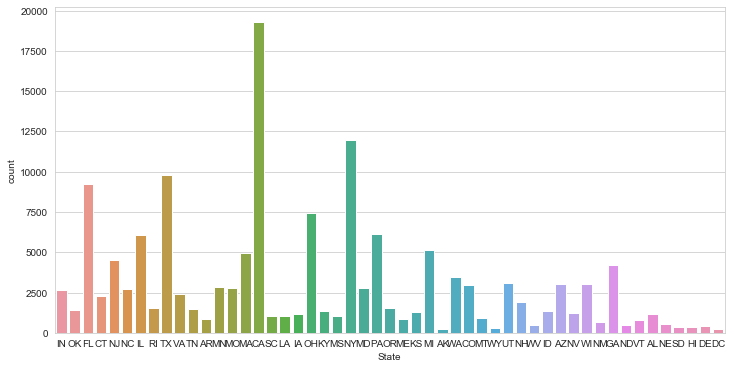

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df_copy1.State)

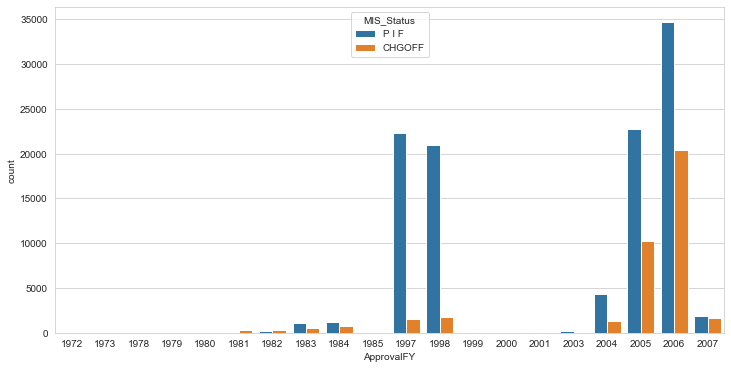

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'ApprovalFY', hue ='MIS_Status', data= df_copy1)

(array([3.0234e+04, 8.5549e+04, 1.1494e+04, 4.3270e+03, 1.1110e+03,
        1.0089e+04, 5.9650e+03, 2.2000e+01, 3.0000e+00, 3.0000e+00]),
 array([  0.,  48.,  96., 144., 192., 240., 288., 336., 384., 432., 480.]),
 <a list of 10 Patch objects>)

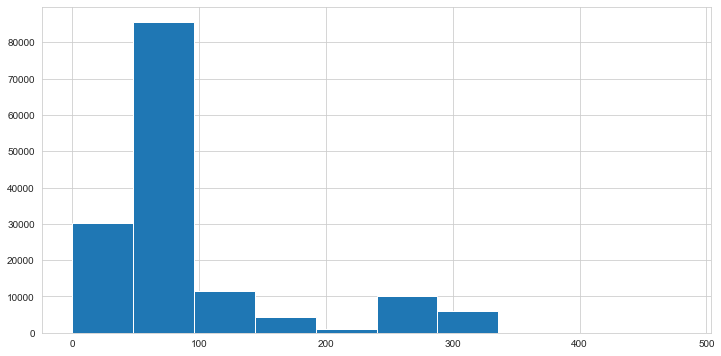

In [20]:
plt.figure(figsize=(12,6))
plt.hist(df_copy1.Term)

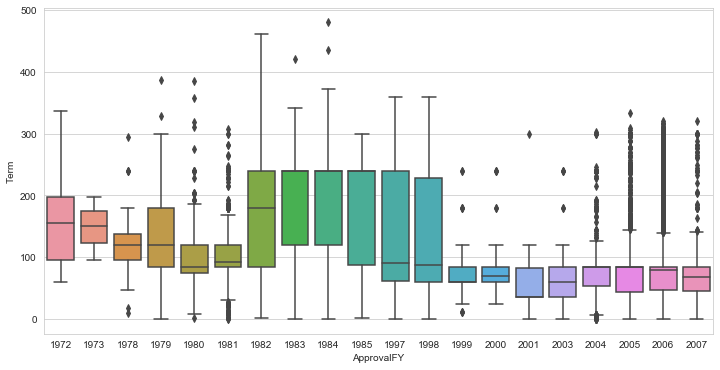

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x="ApprovalFY",y = 'Term',data = df_copy1)


(array([1.48764e+05, 1.10000e+01, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        6.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <a list of 10 Patch objects>)

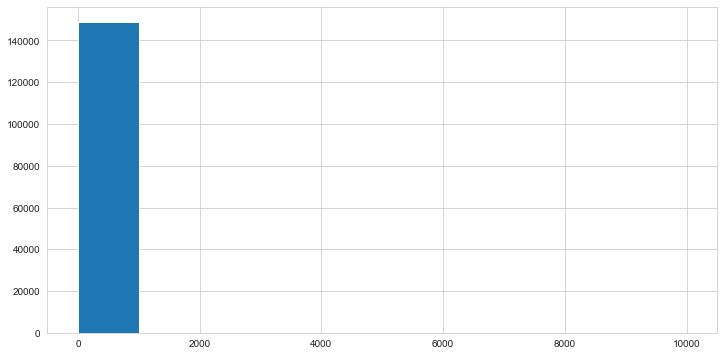

In [22]:
plt.figure(figsize=(12,6))
plt.hist(df_copy1.NoEmp)

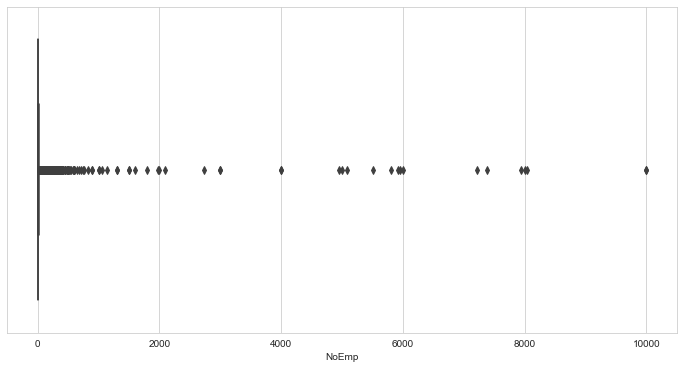

In [23]:
# Looks like There are extreme Outliers in No. of Employees feature. Lets Find outliers using Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df_copy1.NoEmp)

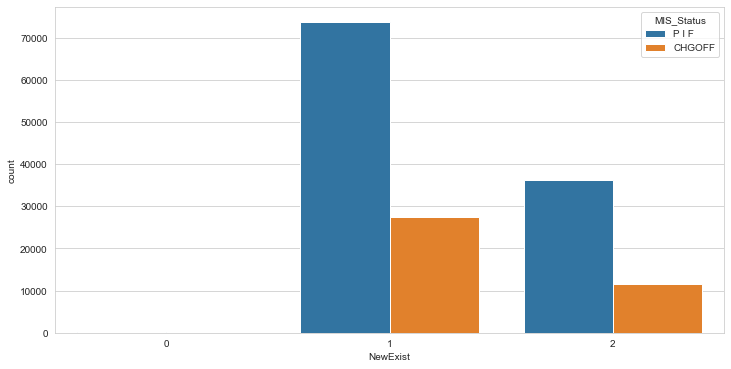

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'NewExist', hue ='MIS_Status', data= df_copy1)

In [25]:
df_copy1.NewExist.value_counts()

1    101004
2     47669
0       124
Name: NewExist, dtype: int64

In [26]:
# Replacing Unknown values (i.e. 0) By Median in NewExist Feature

In [27]:
df_copy1.NewExist.replace(0, df_copy1.NewExist.median(), inplace= True)
df_copy1.NewExist.value_counts()

1    101128
2     47669
Name: NewExist, dtype: int64

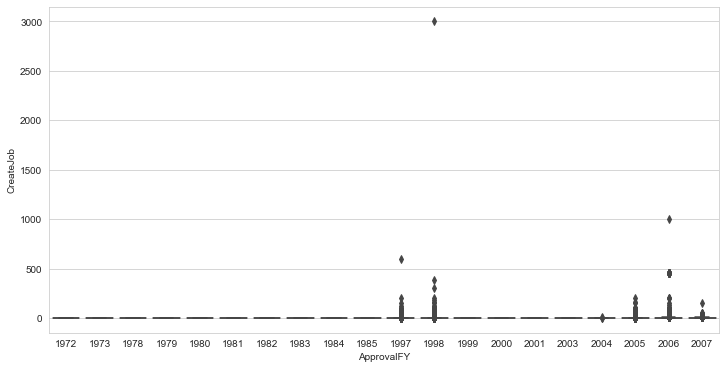

In [28]:
# No. of Jobs Created per Financial Year
plt.figure(figsize=(12,6))
sns.boxplot(x= 'ApprovalFY',y='CreateJob', data = df_copy1,hue_order='CreateJob',dodge =False)

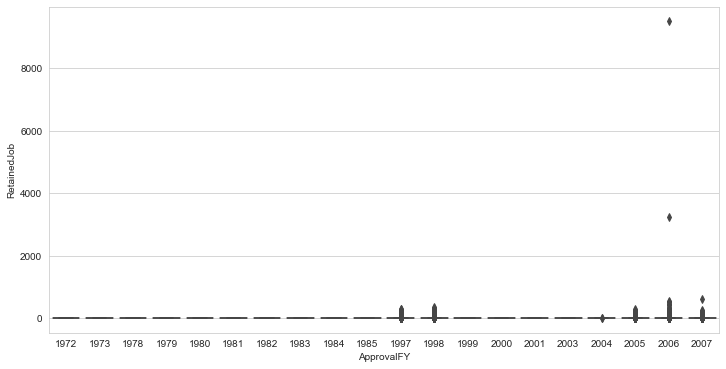

In [29]:
# No. of Jobs Retained per Financial Year
plt.figure(figsize=(12,6))
sns.boxplot(x= 'ApprovalFY',y='RetainedJob', data = df_copy1,dodge =False)

In [30]:
df_copy1.head()

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status
0,IN,1997,84,4,2,0,0,0,N,Y,$0.00,P I F
1,IN,1997,60,2,2,0,0,0,N,Y,$0.00,P I F
2,IN,1997,180,7,1,0,0,0,N,N,$0.00,P I F
3,OK,1997,60,2,1,0,0,0,N,Y,$0.00,P I F
4,FL,1997,240,14,1,7,7,0,N,N,$0.00,P I F


In [31]:
df_copy1.RevLineCr.value_counts()

N    70755
Y    49581
0    23646
T     4809
1        3
`        2
,        1
Name: RevLineCr, dtype: int64

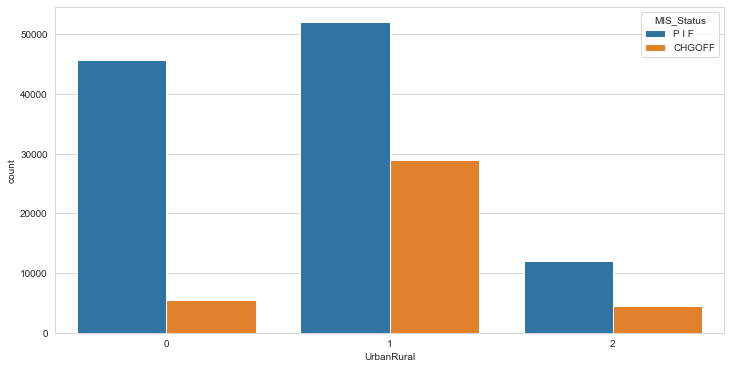

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'UrbanRural', hue ='MIS_Status', data= df_copy1)

In [33]:
df_copy1['RevLineCr'] = df_copy1.RevLineCr.map(({'N':0, 'Y':1,'0':0,'T':0,'1':0,'`':0,',':0, }))

In [34]:
df_copy1.head()

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status
0,IN,1997,84,4,2,0,0,0,0,Y,$0.00,P I F
1,IN,1997,60,2,2,0,0,0,0,Y,$0.00,P I F
2,IN,1997,180,7,1,0,0,0,0,N,$0.00,P I F
3,OK,1997,60,2,1,0,0,0,0,Y,$0.00,P I F
4,FL,1997,240,14,1,7,7,0,0,N,$0.00,P I F


In [35]:
df_copy1.RevLineCr.value_counts()

0    99216
1    49581
Name: RevLineCr, dtype: int64

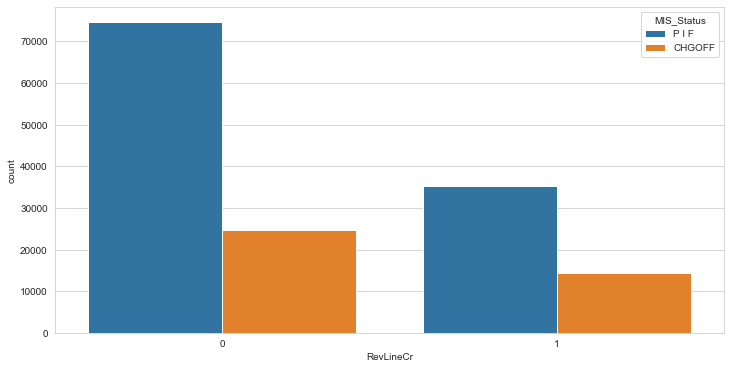

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'RevLineCr', hue ='MIS_Status', data= df_copy1)

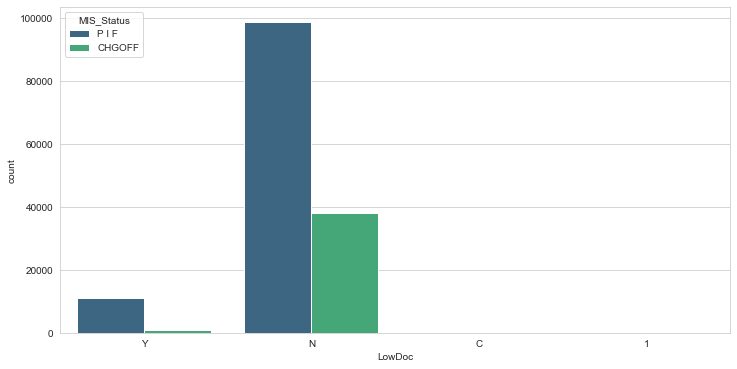

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'LowDoc', hue ='MIS_Status', data= df_copy1,palette='viridis')

In [38]:
df_copy1['LowDoc'] = df_copy1.LowDoc.map(({'N':0, 'Y':1,'C':0,'1':0 }))
df_copy1.LowDoc.value_counts()

0    136777
1     12020
Name: LowDoc, dtype: int64

In [39]:
df_copy1['BalanceGross'].value_counts()

$0.00           148795
$12,750.00           1
$827,875.00          1
Name: BalanceGross, dtype: int64

In [40]:
# BalanceGross Attribute having two outliers and all other unique values. so this faeture does not add value to the data analysis. so we will drop it
df_copy1.drop(labels = 'BalanceGross', axis = 1, inplace= True)
df_copy1.head()

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status
0,IN,1997,84,4,2,0,0,0,0,1,P I F
1,IN,1997,60,2,2,0,0,0,0,1,P I F
2,IN,1997,180,7,1,0,0,0,0,0,P I F
3,OK,1997,60,2,1,0,0,0,0,1,P I F
4,FL,1997,240,14,1,7,7,0,0,0,P I F


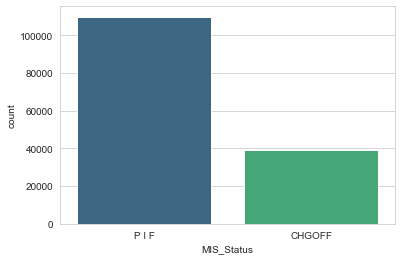

In [41]:
sns.countplot(x= 'MIS_Status', data = df_copy1, palette='viridis')

In [42]:
df_copy1.MIS_Status.value_counts()

P I F     109890
CHGOFF     38907
Name: MIS_Status, dtype: int64

In [43]:
df_copy1['MIS_Status'] = df_copy1.MIS_Status.map(({'P I F':0, 'CHGOFF':1}))
df_copy1.MIS_Status.value_counts()

0    109890
1     38907
Name: MIS_Status, dtype: int64

In [44]:
for i in np.array(df_copy1.columns):
    print('Unique values in ' + str(i) + ' attribute are {}'.format(len(df_copy1[i].unique()))  )

Unique values in State attribute are 51
Unique values in ApprovalFY attribute are 20
Unique values in Term attribute are 342
Unique values in NoEmp attribute are 289
Unique values in NewExist attribute are 2
Unique values in CreateJob attribute are 105
Unique values in RetainedJob attribute are 167
Unique values in UrbanRural attribute are 3
Unique values in RevLineCr attribute are 2
Unique values in LowDoc attribute are 2
Unique values in MIS_Status attribute are 2


In [45]:
df_copy2 = pd.get_dummies(df_copy1, columns=['UrbanRural','NewExist'], drop_first=True)

In [46]:
df_copy2.head()

,State,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,UrbanRural_1,UrbanRural_2,NewExist_2
0,IN,1997,84,4,0,0,0,1,0,0,0,1
1,IN,1997,60,2,0,0,0,1,0,0,0,1
2,IN,1997,180,7,0,0,0,0,0,0,0,0
3,OK,1997,60,2,0,0,0,1,0,0,0,0
4,FL,1997,240,14,7,7,0,0,0,0,0,0


In [47]:
df_copy2.columns

Index(['State', 'ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'RevLineCr', 'LowDoc', 'MIS_Status', 'UrbanRural_1', 'UrbanRural_2',
       'NewExist_2'],
      dtype='object')

In [48]:
df_copy3 = df_copy2[[ 'Term', 'NoEmp', 'NewExist_2', 'CreateJob','RetainedJob','RevLineCr', 'LowDoc', 'MIS_Status',
                     'UrbanRural_1','UrbanRural_2']]
df_copy3.head()

,Term,NoEmp,NewExist_2,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,UrbanRural_1,UrbanRural_2
0,84,4,1,0,0,0,1,0,0,0
1,60,2,1,0,0,0,1,0,0,0
2,180,7,0,0,0,0,0,0,0,0
3,60,2,0,0,0,0,1,0,0,0
4,240,14,0,7,7,0,0,0,0,0


In [49]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [50]:
std_scaler = StandardScaler()
mx_scaler = MinMaxScaler()

In [51]:
final_df = std_scaler.fit_transform(df_copy3)
final_df2 = mx_scaler.fit_transform(df_copy3)

In [52]:
final_df = pd.DataFrame(final_df,columns=[ 'Term', 'NoEmp', 'NewExist_2', 'CreateJob','RetainedJob','RevLineCr', 'LowDoc', 'MIS_Status',
                     'UrbanRural_1','UrbanRural_2'])
final_df2 = pd.DataFrame(final_df2,columns=[ 'Term', 'NoEmp', 'NewExist_2', 'CreateJob','RetainedJob','RevLineCr', 'LowDoc', 'MIS_Status',
                     'UrbanRural_1','UrbanRural_2'])
final_df.head()

,Term,NoEmp,NewExist_2,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,UrbanRural_1,UrbanRural_2
0,-0.129847,-0.068496,1.456524,-0.116820,-0.132788,-0.706914,3.373295,-0.595024,-1.093532,-0.35377
1,-0.475622,-0.094461,1.456524,-0.116820,-0.132788,-0.706914,3.373295,-0.595024,-1.093532,-0.35377
2,1.253249,-0.029548,-0.686566,-0.116820,-0.132788,-0.706914,-0.296446,-0.595024,-1.093532,-0.35377
3,-0.475622,-0.094461,-0.686566,-0.116820,-0.132788,-0.706914,3.373295,-0.595024,-1.093532,-0.35377
4,2.117685,0.061331,-0.686566,0.519459,0.119155,-0.706914,-0.296446,-0.595024,-1.093532,-0.35377


In [53]:
final_df2.head()

,Term,NoEmp,NewExist_2,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,UrbanRural_1,UrbanRural_2
0,0.175,0.0004,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.125,0.0002,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
2,0.375,0.0007,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.125,0.0002,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.500,0.0014,0.0,0.002333,0.000737,0.0,0.0,0.0,0.0,0.0


In [54]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148797 entries, 0 to 148796
Data columns (total 10 columns):
Term            148797 non-null float64
NoEmp           148797 non-null float64
NewExist_2      148797 non-null float64
CreateJob       148797 non-null float64
RetainedJob     148797 non-null float64
RevLineCr       148797 non-null float64
LowDoc          148797 non-null float64
MIS_Status      148797 non-null float64
UrbanRural_1    148797 non-null float64
UrbanRural_2    148797 non-null float64
dtypes: float64(10)
memory usage: 11.4 MB


In [55]:
final_df2['MIS_Status'] = final_df2['MIS_Status'].astype(int)
final_df2['NewExist_2'] = final_df2['NewExist_2'].astype(int)
final_df2['LowDoc'] = final_df2['LowDoc'].astype(int)
final_df2['UrbanRural_1'] = final_df2['UrbanRural_1'].astype(int)
final_df2['UrbanRural_2'] = final_df2['UrbanRural_2'].astype(int)
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148797 entries, 0 to 148796
Data columns (total 10 columns):
Term            148797 non-null float64
NoEmp           148797 non-null float64
NewExist_2      148797 non-null int32
CreateJob       148797 non-null float64
RetainedJob     148797 non-null float64
RevLineCr       148797 non-null float64
LowDoc          148797 non-null int32
MIS_Status      148797 non-null int32
UrbanRural_1    148797 non-null int32
UrbanRural_2    148797 non-null int32
dtypes: float64(5), int32(5)
memory usage: 8.5 MB


In [56]:
final_df2.head()

,Term,NoEmp,NewExist_2,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,UrbanRural_1,UrbanRural_2
0,0.175,0.0004,1,0.000000,0.000000,0.0,1,0,0,0
1,0.125,0.0002,1,0.000000,0.000000,0.0,1,0,0,0
2,0.375,0.0007,0,0.000000,0.000000,0.0,0,0,0,0
3,0.125,0.0002,0,0.000000,0.000000,0.0,1,0,0,0
4,0.500,0.0014,0,0.002333,0.000737,0.0,0,0,0,0


**Now Data is cleaned for further processing.**
**Moving to Model Building Phase**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
final_df2.columns

Index(['Term', 'NoEmp', 'NewExist_2', 'CreateJob', 'RetainedJob', 'RevLineCr',
       'LowDoc', 'MIS_Status', 'UrbanRural_1', 'UrbanRural_2'],
      dtype='object')

In [59]:
X = final_df2[['Term', 'NoEmp', 'NewExist_2', 'CreateJob', 'RetainedJob', 'RevLineCr',
       'LowDoc', 'UrbanRural_1', 'UrbanRural_2']]
y = final_df2['MIS_Status']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify= y)

**1. Logistic Regression Model**

In [61]:
# We will first try Logistic Regression.
lr = LogisticRegression()

In [62]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = lr.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, y_pred)

0.836491935483871

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30954  2014]
 [ 5285  6387]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32968
           1       0.76      0.55      0.64     11672

    accuracy                           0.84     44640
   macro avg       0.81      0.74      0.77     44640
weighted avg       0.83      0.84      0.83     44640



So the accuracy Score obtained for Logistic regression Model is 83.55%

**2. Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier(random_state=101)

In [70]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [71]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9066532258064516
[[31309  1659]
 [ 2508  9164]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     32968
           1       0.85      0.79      0.81     11672

    accuracy                           0.91     44640
   macro avg       0.89      0.87      0.88     44640
weighted avg       0.91      0.91      0.91     44640



So the accuracy Score obtained for Decision Tree Model is 90.72%

**3. Random Forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(n_estimators= 500, random_state= 101)

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [75]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.91581541218638
[[31385  1583]
 [ 2175  9497]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     32968
           1       0.86      0.81      0.83     11672

    accuracy                           0.92     44640
   macro avg       0.90      0.88      0.89     44640
weighted avg       0.91      0.92      0.92     44640



So the accuracy Score obtained for Random Forest Model is 91.58%

**Hyperparameter Tuning Using Grid Search CV**

In [76]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [79]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
            'max_depth': [3, 4,5, 6],
            'min_samples_leaf': [0.4, 0.5],
            'max_features': [0.2, 0.4,0.6, 0.8]}
grid_dt = GridSearchCV(estimator = rf,
                        param_grid = params_dt,
                        scoring = 'accuracy',
                        cv = 10,
                        n_jobs = -1)



In [80]:
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=101,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [81]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.4}


In [85]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy {}'.format(best_CV_score))

Best CV accuracy 0.7385197346313738


In [83]:
#Extracting the best estimator
best_model = grid_dt.best_estimator_
test_acc = best_model.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.739


**Conclusion : Random Forest with n_estimators= 500 Gives best result with Accuracy of 91% .**